Originalcodes

In [ ]:
import mne

# Load some example MNE epochs data
epochs = mne.datasets.sample.load_data().pick_types(
    eeg=True, meg=False).filter(1, 30)

# Compute the PSD for each epoch
psds, freqs = mne.time_frequency.psd_multitaper(
    epochs, fmin=1, fmax=30, n_jobs=1)

# Plot the PSD with confidence intervals for the first epoch
epoch_idx = 0
psd_mean = psds[epoch_idx].mean(axis=0)
psd_std = psds[epoch_idx].std(axis=0)
psd_upper = psd_mean + psd_std
psd_lower = psd_mean - psd_std

fig, ax = plt.subplots()
ax.plot(freqs, psd_mean)
ax.fill_between(freqs, psd_upper, psd_lower, alpha=0.2)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Power Spectral Density (normalized)')
ax.set_title(f'Epoch {epoch_idx+1} PSD with 95% Confidence Interval')
plt.show()


In [1]:
import os
import sys
import mne
import matplotlib
import random
sys.path.insert(1,'..')
from codes.loader import Loaddata

class inputdata

## Load raw

In [2]:

self = Loaddata()
import numpy as np

def twolabel_raw(self, folder_path,ai_path, prf=None, norm = False):
       
        data, t = self.readEEG(folder_path+"/"+prf+".csv")
        label1 = self.readStageSeq(folder_path+"/"+prf+"_Trend.csv")
        label2 = self.readStageSeq(ai_path+"/"+prf+".txt")
        
        label = np.char.add(label1, label2)      
        onset = np.arange(0, 4*len(label),4)      
        fourS = np.array(len(label)*[4])
        my_annot = mne.Annotations(onset, duration=fourS, description=label)
        inf = mne.create_info(["eeg"], 128,'eeg')      
        data = np.array(data).reshape(1, -1)
        #norm
        if norm:
                data -= np.mean(data, axis=1, keepdims=True)
                data = data / np.std(data, axis=1, keepdims=True)
        raw = mne.io.RawArray(data, inf)      
        raw.set_annotations(my_annot)
        return raw

# o_pt = "./data/three/20200601S181BL-1/"
# sap_path = "./data/sets/set0/"

pf = "20200601S181BL-1"
# raw = twolabel_raw(self, "../data/allraw/20200601S181BL-1","../data/aiset", pf)
raw = twolabel_raw(self, "../data/allraw/20200601S181BL-1","../data/aiset", pf, norm = 1) 

# raw_n = twolabel_raw(self, "../data/allraw/20200601S181BL-1","../data/aiset", pf, norm = 1) 



---------------------
Started to read ../data/allraw/20200601S181BL-1/20200601S181BL-1.csv. It may take a few minutes before starting to classify. Please wait.
---------------------
Creating RawArray with float64 data, n_channels=1, n_times=2780160
    Range : 0 ... 2780159 =      0.000 ... 21719.992 secs
Ready.


## stft vis

In [1]:
import mne
eps = mne.read_epochs("../data/all_onelabel.fif")
h = eps['H'].get_data().reshape(-1,512)
l = eps['L'].get_data().reshape(-1, 512)
r = eps['R'].get_data().reshape(-1,512)
n = eps['S'].get_data().reshape(-1,512)

Reading d:\OneDrive - 筑波大学\lab\codes\MSlab_project\codes\..\data\all_onelabel.fif ...


C:\Users\ImpWa\AppData\Local\Temp\ipykernel_15276\3878594413.py:2: RuntimeWarning: This filename (../data/all_onelabel.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  eps = mne.read_epochs("../data/all_onelabel.fif")


Isotrak not found
    Found the data of interest:
        t =       0.00 ...    3992.19 ms
        0 CTF compensation matrices available
Not setting metadata
556519 matching events found
No baseline correction applied
0 projection items activated


Original

In [4]:
h[0].shape

(512,)

In [2]:
from scipy import signal
import numpy as np
eegSegment = h[0]

def filtering(Zxx, freqs, lowerFreq, upperFreq):
        zipped = list(filter(lambda x: lowerFreq <=x[1] and x[1] < upperFreq, zip(Zxx, freqs)))
        
        return np.array([e[0] for e in zipped]), np.array([e[1] for e in zipped])

def binning(Zxx, freqs, freqBinNum):
    binSize = np.int(np.floor(1.0 * len(Zxx) / freqBinNum))
    # print(binSize)
    Zxx_binned = np.array([np.sum(np.abs(Zxx[(binID*binSize):((binID+1)*binSize)]),axis=0) for binID in range(freqBinNum)])

    freqs_binned = np.array([np.mean(freqs[(binID*binSize):((binID+1)*binSize)],axis=0) for binID in range(freqBinNum)])
    return Zxx_binned, freqs_binned



freqs, segment_times, Zxx = signal.stft(eegSegment, fs=128, nperseg=256)

Zxx_filtered, freqs_filtered = filtering(Zxx, freqs, lowerFreq=1, upperFreq=12)

Zxx_binned, freqs_binned = binning(Zxx_filtered, freqs_filtered, 22)
Zxx_flattened = Zxx_binned.reshape(-1)
#----------------
# add time after light period started as a features
rawDataWithSTFT = np.r_[eegSegment, Zxx_flattened]

# Zxx_binned.shape


C:\Users\ImpWa\AppData\Local\Temp\ipykernel_15276\1265004821.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  binSize = np.int(np.floor(1.0 * len(Zxx) / freqBinNum))


In [21]:
np.abs(Zxx_filtered)
# np.abs(Zxx_filtered[0:1])
# np.sum(np.abs(Zxx_filtered[0:1]),axis = 0)


array([[0.12482377, 0.12967299, 0.17079637, 0.04588931, 0.03691379],
       [0.05706981, 0.20425025, 0.20329916, 0.0553209 , 0.06960202],
       [0.05667662, 0.10791617, 0.1592829 , 0.09234744, 0.10157435],
       [0.15880149, 0.1421709 , 0.32581287, 0.07860295, 0.1087107 ],
       [0.20462254, 0.13348685, 0.46930489, 0.34931204, 0.11024493],
       [0.17212645, 0.23306219, 0.28476287, 0.24107495, 0.11407282],
       [0.07423838, 0.22803767, 0.16763111, 0.11409056, 0.09975642],
       [0.02730864, 0.14742492, 0.03530279, 0.17460141, 0.07932922],
       [0.0602157 , 0.19352496, 0.05052302, 0.12698798, 0.03525533],
       [0.02812041, 0.21670627, 0.05155773, 0.03984407, 0.06741515],
       [0.05085678, 0.24661852, 0.11562697, 0.21868202, 0.1689619 ],
       [0.06275202, 0.23163628, 0.21395383, 0.25344871, 0.20613455],
       [0.11578158, 0.07381523, 0.40300847, 0.04991948, 0.15177255],
       [0.21745061, 0.24070433, 0.36840366, 0.26311444, 0.06075546],
       [0.24609685, 0.20837302, 0.

In [3]:
np.abs(Zxx_filtered)-Zxx_binned


array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

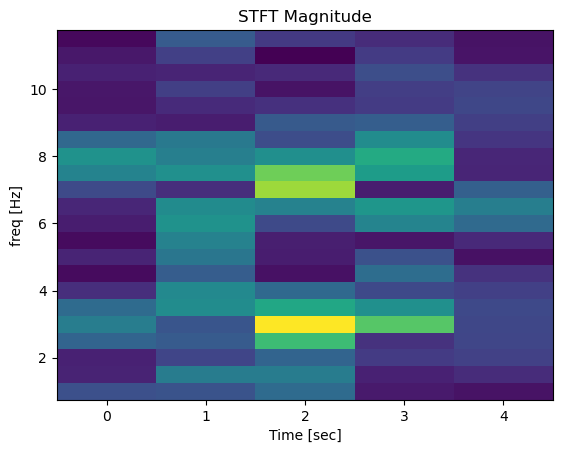

In [9]:
import matplotlib.pyplot as plt
plt.pcolormesh(segment_times, freqs_binned, np.abs(Zxx_binned))#shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('freq [Hz]')
plt.xlabel('Time [sec]')
plt.show()

updated 5*5

In [4]:
from scipy import signal
import numpy as np
def stft_bin(eegepoch):
    samplingFreq = 128
    stft_nperseg = 256
    high_pass = 1
    low_pass = 12 

    freqs, segment_times, Zxx = signal.stft(eegepoch, fs=samplingFreq, nperseg=stft_nperseg)
    def filtering(Zxx, freqs, lowerFreq, upperFreq):
        zipped = list(filter(lambda x: lowerFreq <=
                             x[1] and x[1] < upperFreq, zip(Zxx, freqs)))
        return np.array([e[0] for e in zipped]), np.array([e[1] for e in zipped])

    Zxx_filtered, f = filtering(Zxx, freqs, high_pass, low_pass)
    Zxx_binned = np.abs(Zxx_filtered)


    
    return segment_times,f,Zxx_binned

In [5]:
t = stft_bin(h[0])
segment_times,f = t[0],t[1]

In [9]:
np.std(t[2],axis=0)

array([0.06719814, 0.06360702, 0.12593497, 0.08844255, 0.04257309])

In [3]:
from scipy import signal
import numpy as np
def stft_bin(eegepoch):
    samplingFreq = 128
    stft_nperseg = 256
    high_pass = 1
    low_pass = 12 

    freqs, segment_times, Zxx = signal.stft(eegepoch, fs=samplingFreq, nperseg=stft_nperseg)
    def filtering(Zxx, freqs, lowerFreq, upperFreq):
        zipped = list(filter(lambda x: lowerFreq <=
                             x[1] and x[1] < upperFreq, zip(Zxx, freqs)))
        return np.array([e[0] for e in zipped]), np.array([e[1] for e in zipped])

    Zxx_filtered, f = filtering(Zxx, freqs, high_pass, low_pass)
    Zxx_binned = np.abs(Zxx_filtered)


    
    return Zxx_binned

In [4]:
# from scipy import signal
# import numpy as np
# def stft_bin(eegepoch):
#     samplingFreq = 128
#     stft_nperseg = 256
#     high_pass = 1
#     low_pass = 12 

#     freqs, segment_times, Zxx = signal.stft(eegepoch, fs=samplingFreq, nperseg=stft_nperseg)
#     def filtering(Zxx, freqs, lowerFreq, upperFreq):
#         zipped = list(filter(lambda x: lowerFreq <=
#                              x[1] and x[1] < upperFreq, zip(Zxx, freqs)))
#         return np.array([e[0] for e in zipped]), np.array([e[1] for e in zipped])

#     Zxx_filtered, f = filtering(Zxx, freqs, high_pass, low_pass)
    
#     # freqNum = round((low_pass-high_pass) / freq_tick)
#     freqNum = Zxx_filtered.shape[0]
#     binSize = (len(Zxx) // freqNum)
#     bins = range(-(-freqNum//binSize))

#     Zxx_binned = np.array([np.sum(np.abs(Zxx_filtered[(binID*binSize):((binID+1)*binSize)]), axis=0) for binID in bins])#ceil
    
#     # return np.array([np.sum(np.abs(Zxx_filtered[(binID*binSize):((binID+1)*binSize)]), axis=0) for binID in bins])#ceil

    
#     return Zxx_binned

H and L

In [12]:
import matplotlib.pyplot as plt
import numpy as np

l_freqMatrix = [stft_bin(l[i]) for i in range(len(l))]
h_freqMatrix = [stft_bin(h[i]) for i in range(len(h))]



In [13]:

p1 = np.mean(l_freqMatrix, axis=0)
p2 = np.std(l_freqMatrix, axis=0)
p3 = np.mean(h_freqMatrix, axis=0)
p4 = np.std(h_freqMatrix, axis=0)


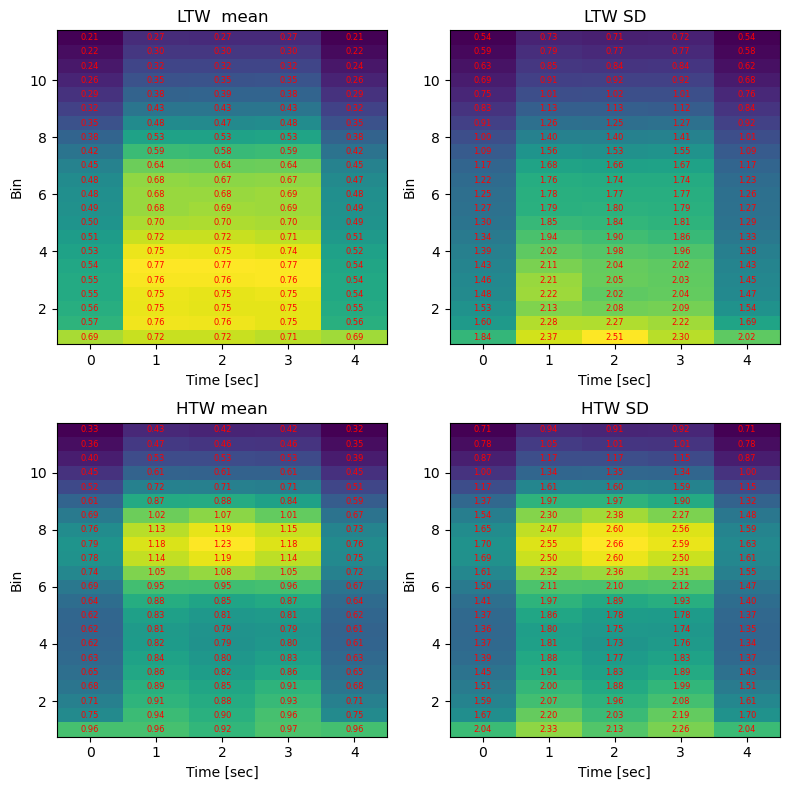

In [14]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

# Plot the first subplot in the upper left corner
pcm = axs[0, 0].pcolormesh(segment_times, f, p1)
axs[0, 0].set_title('LTW  mean')
axs[0, 0].set_ylabel('Bin')
axs[0, 0].set_xlabel('Time [sec]')

# Plot the second subplot in the upper right corner

pcm = axs[0, 1].pcolormesh(segment_times, f, p2)
axs[0, 1].set_title('LTW SD')
axs[0, 1].set_ylabel('Bin')
axs[0, 1].set_xlabel('Time [sec]')

# Plot the third subplot in the lower left corner

pcm = axs[1, 0].pcolormesh(segment_times, f, p3)
axs[1, 0].set_title('HTW mean')
axs[1, 0].set_ylabel('Bin')
axs[1, 0].set_xlabel('Time [sec]')

# Plot the fourth subplot in the lower right corner

pcm = axs[1, 1].pcolormesh(segment_times, f, p4)
axs[1, 1].set_title('HTW SD')
axs[1, 1].set_ylabel('Bin')
axs[1, 1].set_xlabel('Time [sec]')

# #
# fig.colorbar(pcm, ax=axs[0, 0])
# fig.colorbar(pcm, ax=axs[0, 1])
# fig.colorbar(pcm, ax=axs[1, 0])
# fig.colorbar(pcm, ax=axs[1, 1])

x, y = segment_times, f
for i in range(len(y)):
    for j in range(len(x)):
        axs[0, 0].annotate(f'{p1[i, j]:.2f}', xy=(x[j], y[i]), ha='center', va='center', fontsize=6, color ="r")
        axs[0, 1].annotate(f'{p2[i, j]:.2f}', xy=(x[j], y[i]), ha='center', va='center', fontsize=6, color ="r")
        axs[1, 0].annotate(f'{p3[i, j]:.2f}', xy=(x[j], y[i]), ha='center', va='center', fontsize=6, color ="r")
        axs[1, 1].annotate(f'{p4[i, j]:.2f}', xy=(x[j], y[i]), ha='center', va='center', fontsize=6, color ="r")

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


HH HL LL

In [1]:
import mne
eps = mne.read_epochs("../data/all_twolabel.fif")
hh = eps['HH'].get_data().reshape(-1, 512)
hl = eps['HL'].get_data().reshape(-1, 512)
ll = eps['LL'].get_data().reshape(-1, 512)


Reading d:\OneDrive - 筑波大学\lab\codes\MSlab_project\codes\..\data\all_twolabel.fif ...


C:\Users\ImpWa\AppData\Local\Temp\ipykernel_16456\3634156446.py:2: RuntimeWarning: This filename (../data/all_twolabel.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  eps = mne.read_epochs("../data/all_twolabel.fif")


Isotrak not found
    Found the data of interest:
        t =       0.00 ...    3992.19 ms
        0 CTF compensation matrices available
Not setting metadata
529509 matching events found
No baseline correction applied
0 projection items activated


In [21]:
np.max([stft_bin(l[i]) for i in range(len(l))],axis=0)

array([[ 274.93552474, 1127.96832208, 1023.46094944,  819.75545488,
         758.48876933],
       [ 170.15374154,  826.01423827,  254.66733472,  325.66122919,
         259.61413457],
       [ 162.47652432,  354.3173048 ,  123.51360772,  138.7226349 ,
         164.01781575],
       [ 126.95971017,  203.52399805,  190.04035969,  157.71285551,
         120.08140071],
       [  46.34443025,  133.31353516,   34.85738715,   66.37877317,
          46.78527664]])

In [4]:
import matplotlib.pyplot as plt
import numpy as np

ll_freqMatrix = [stft_bin(ll[i]) for i in range(len(ll))]
hl_freqMatrix = [stft_bin(hl[i]) for i in range(len(hl))]
hh_freqMatrix = [stft_bin(hh[i]) for i in range(len(hh))]


In [9]:
segment_times = range(5)
f = np.arange(1.0, 12.0, 0.5)
#  f = range(1.0 ,12.0 ,0.5)

In [5]:
# p1 = np.mean([stft_bin(ll[i]) for i in range(len(ll))], axis=0)
# p2 = np.std([stft_bin(ll[i]) for i in range(len(ll))], axis=0)
# p3 = np.mean([stft_bin(hh[i]) for i in range(len(hh))], axis=0)
# p4 = np.std([stft_bin(hh[i]) for i in range(len(hh))], axis=0)
# p5 = np.mean([stft_bin(hl[i]) for i in range(len(hl))], axis=0)
# p6 = np.std([stft_bin(hl[i]) for i in range(len(hl))], axis=0)


p1 = np.mean(ll_freqMatrix, axis=0)
p2 = np.std(ll_freqMatrix, axis=0)
p3 = np.mean(hh_freqMatrix, axis=0)
p4 = np.std(hh_freqMatrix, axis=0)
p5 = np.mean(hl_freqMatrix, axis=0)
p6 = np.std(hl_freqMatrix, axis=0)


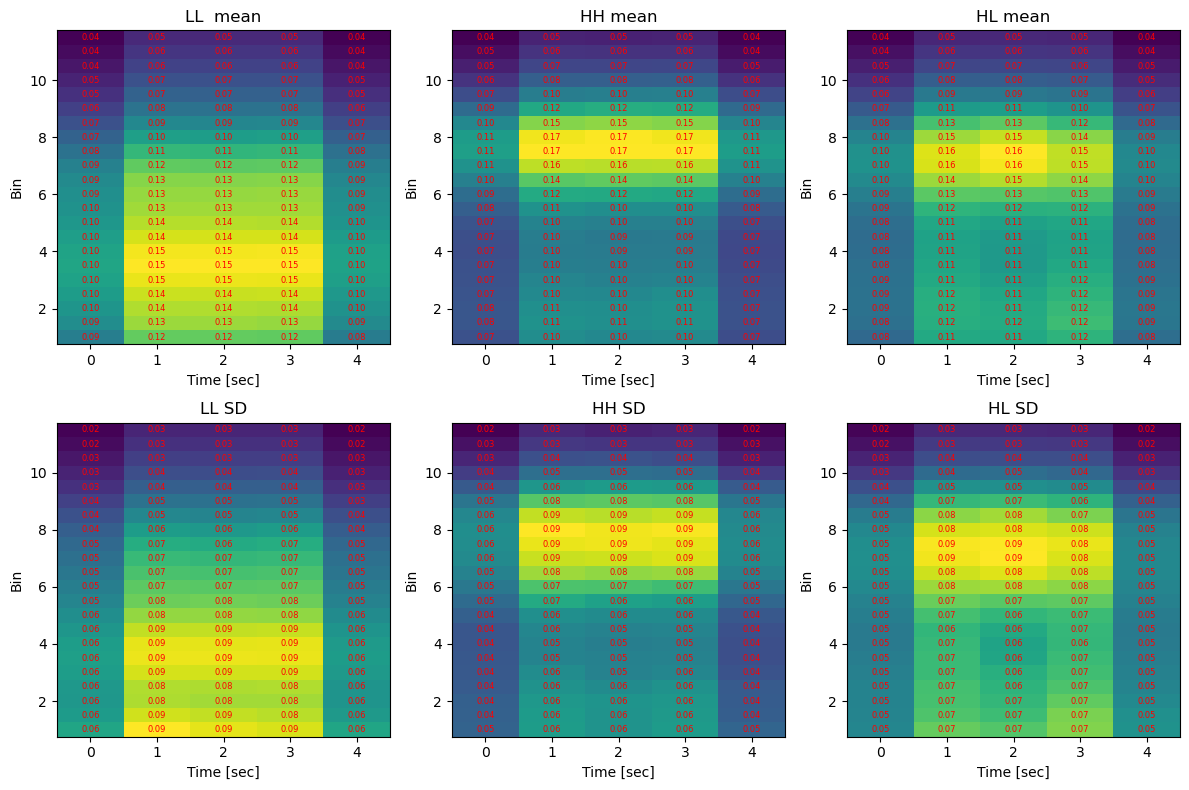

In [10]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))


# p1 = np.mean([stft_bin(l[i]) for i in range(len(l))], axis=0)
# p2 = np.std([stft_bin(l[i]) for i in range(len(l))], axis=0)
# p3 = np.mean([stft_bin(h[i]) for i in range(len(h))], axis=0)
# p4 = np.std([stft_bin(h[i]) for i in range(len(h))], axis=0)
# p5 = np.mean([stft_bin(m[i]) for i in range(len(m))], axis=0)
# p6 = np.std([stft_bin(m[i]) for i in range(len(m))], axis=0)

# Plot the first subplot in the upper left corner
axs[0, 0].pcolormesh(segment_times, f, p1)
axs[0, 0].set_title('LL  mean')
axs[0, 0].set_ylabel('Bin')
axs[0, 0].set_xlabel('Time [sec]')

# Plot the second subplot in the upper right corner
axs[1, 0].pcolormesh(segment_times, f, p2)
axs[1, 0].set_title('LL SD')
axs[1, 0].set_ylabel('Bin')
axs[1, 0].set_xlabel('Time [sec]')

# Plot the third subplot in the lower left corner
axs[0, 1].pcolormesh(segment_times, f, p3)
axs[0, 1].set_title('HH mean')
axs[0, 1].set_ylabel('Bin')
axs[0, 1].set_xlabel('Time [sec]')

# Plot the fourth subplot in the lower right corner
axs[1, 1].pcolormesh(segment_times, f, p4)
axs[1, 1].set_title('HH SD')
axs[1, 1].set_ylabel('Bin')
axs[1, 1].set_xlabel('Time [sec]')

axs[0, 2].pcolormesh(segment_times, f, p5)
axs[0, 2].set_title('HL mean')
axs[0, 2].set_ylabel('Bin')
axs[0, 2].set_xlabel('Time [sec]')

axs[1, 2].pcolormesh(segment_times, f, p6)
axs[1, 2].set_title('HL SD')
axs[1, 2].set_ylabel('Bin')
axs[1, 2].set_xlabel('Time [sec]')

# 
x, y = segment_times, f
for i in range(len(y)):
    for j in range(len(x)):
        axs[0, 0].annotate(f'{p1[i, j]:.2f}', xy=(
            x[j], y[i]), ha='center', va='center', fontsize=6, color="r")
        axs[0, 1].annotate(f'{p3[i, j]:.2f}', xy=(
            x[j], y[i]), ha='center', va='center', fontsize=6, color="r")
        axs[1, 0].annotate(f'{p2[i, j]:.2f}', xy=(
            x[j], y[i]), ha='center', va='center', fontsize=6, color="r")
        axs[1, 1].annotate(f'{p4[i, j]:.2f}', xy=(
            x[j], y[i]), ha='center', va='center', fontsize=6, color="r")
        axs[0, 2].annotate(f'{p5[i, j]:.2f}', xy=(
            x[j], y[i]), ha='center', va='center', fontsize=6, color="r")
        axs[1, 2].annotate(f'{p6[i, j]:.2f}', xy=(
            x[j], y[i]), ha='center', va='center', fontsize=6, color="r")

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


## Paint Raw figure


In [3]:
%matplotlib

raw.load_data().filter(0, 15)
events, id = mne.events_from_annotations(raw)
tmax = 4. - 1. / raw.info['sfreq']  # tmax in included
# picks = mne.pick_types(raw.info, eeg=True, emg=True)
epochs = mne.Epochs(raw=raw, events=events, event_id=id,
                    preload=True, tmin=0., tmax=tmax, baseline=None)
# epochs['HH'][:5].plot(theme="light", scalings=5, title="hh")
# epochs['HL'][:5].plot(theme="light", scalings=5)
# epochs['LL'][:5].plot(theme="light", scalings=5)



Using matplotlib backend: <object object at 0x000001DE94579CD0>
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 15 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 15.00 Hz
- Upper transition bandwidth: 3.75 Hz (-6 dB cutoff frequency: 16.88 Hz)
- Filter length: 113 samples (0.883 sec)

Used Annotations descriptions: ['HH', 'HL', 'HR', 'HS', 'L?', 'LH', 'LL', 'LR', 'LS', 'RL', 'RR', 'RS', 'SL', 'SR', 'SS']
Not setting metadata


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


5430 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 5430 events and 512 original time points ...
0 bad epochs dropped


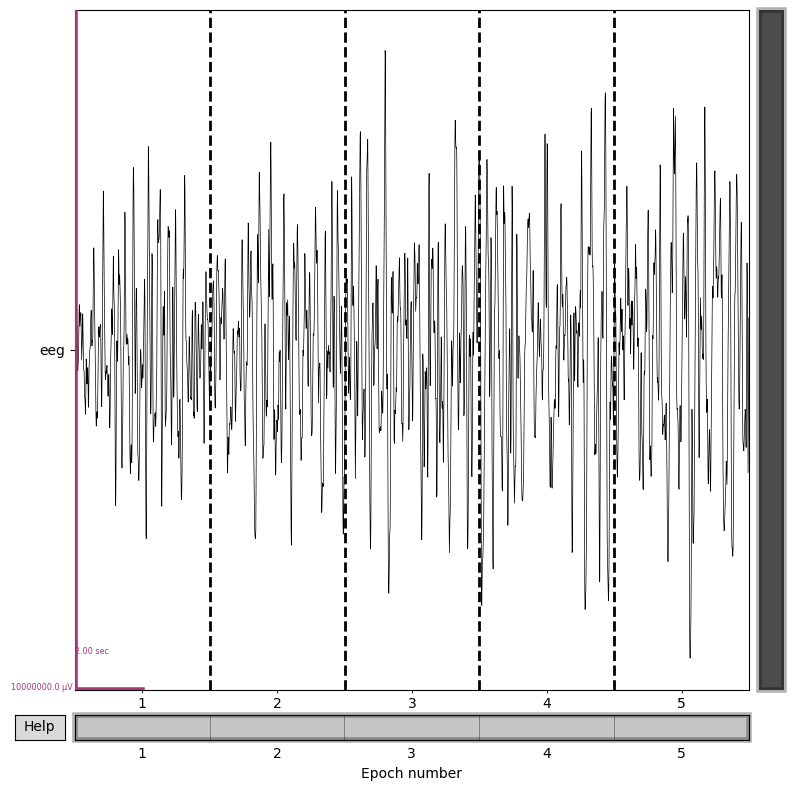

In [11]:
eps["S"][:5].plot(scalings = 5)
plt.show()


In [140]:
import matplotlib.pyplot as plt
import numpy as np
from mne import create_info, EpochsArray
from mne.viz import plot_raw

# Generate some sample EEG data
sampling_rate = 128  # Hz
duration = 4  # seconds
n_epochs = 3
num_samples = n_epochs * sampling_rate * duration
time = np.arange(num_samples) / sampling_rate
eeg_data = np.sin(2 * np.pi * 10 * time) + 0.5 * np.sin(2 *
                                                        np.pi * 50 * time) + np.random.randn(num_samples)

# Create MNE Info object and Epochs object
ch_names = ['EEG %d' % i for i in range(1, 5)]
ch_types = ['eeg'] * 4
info = create_info(ch_names, sfreq=sampling_rate, ch_types=ch_types)
data = np.reshape(eeg_data, (n_epochs, sampling_rate * duration, 4))
epochs = EpochsArray(data, info)

# Plot the EEG data using MNE's plot_raw function
fig = plot_raw(epochs, start=0, duration=duration*n_epochs,
               scalings='auto', color=dict(eeg=(0, 0, 0)))
ax = fig.get_axes()[0]

# Add dotted line at every 4 seconds
for i in range(0, round(duration * n_epochs), 4):
    ax.axvline(x=i, color='gray', linestyle='--')

plt.show()


ValueError: cannot reshape array of size 1536 into shape (3,512,4)

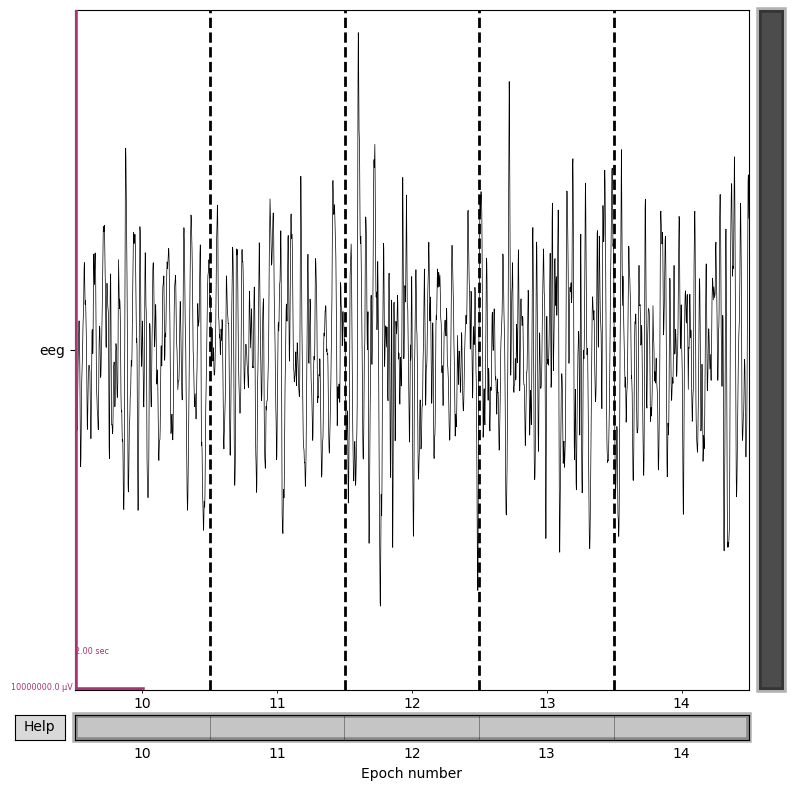

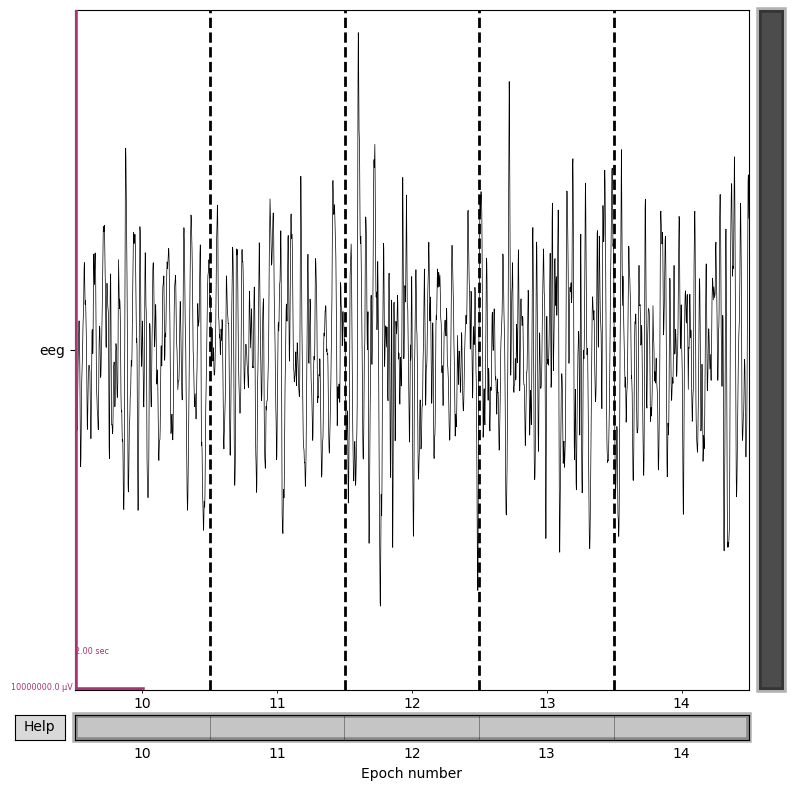

In [153]:
plot_epochs(eps['SS'][:5],scalings=5)


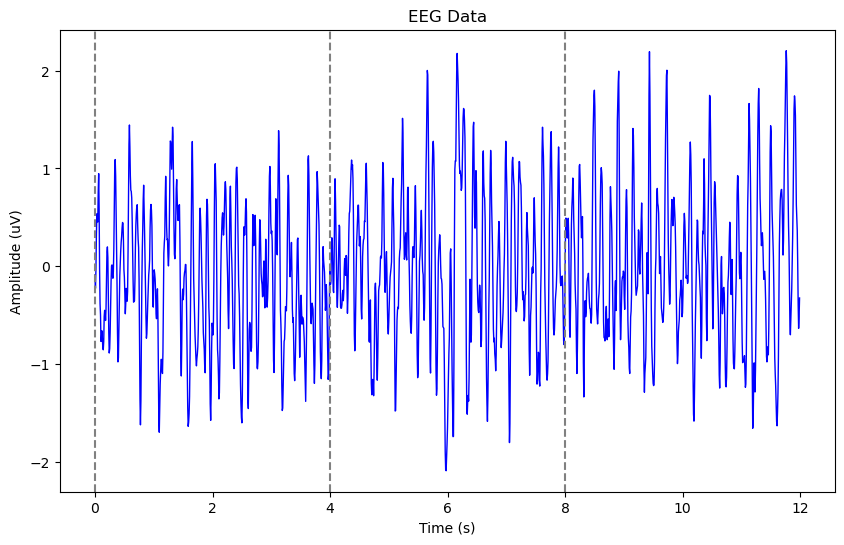

In [139]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample EEG data
sampling_rate = 128  # Hz
duration = 4  # seconds
n_epochs = 3
num_samples = n_epochs*sampling_rate * duration
time = np.arange(num_samples) / sampling_rate
# eeg_data = np.sin(2 * np.pi * 10 * time) + 0.5 * np.sin(2 *np.pi * 50 * time) + np.random.randn(num_samples)
data = eps["HH"].get_data()[:3].reshape(-1)
# Plot the EEG data
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(time, data, linewidth=1,color='b')
# Add dotted line at every 4 seconds
for i in range(0,round(time[-1]), 4):
    ax.axvline(x=i, color='gray', linestyle='--')

ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude (uV)')
ax.set_title('EEG Data')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Generate some sample EEG data
sampling_rate = 128  # Hz
duration = 4  # seconds
n_epochs = 3
num_samples = n_epochs*sampling_rate * duration
time = np.arange(num_samples) / sampling_rate
# eeg_data = np.sin(2 * np.pi * 10 * time) + 0.5 * np.sin(2 *np.pi * 50 * time) + np.random.randn(num_samples)
data = eps["HH"].get_data()[:3].reshape(-1)
# Plot the EEG data
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(time, data, linewidth=1,color='b')
# Add dotted line at every 4 seconds
for i in range(0,round(time[-1]), 4):
    ax.axvline(x=i, color='gray', linestyle='--')

ax.set_xlabel('Time (s)')-
ax.set_ylabel('Amplitude (uV)')
ax.set_title('EEG Data')
plt.show()


In [ ]:
eps['HH'][:3].plot(show=False)
# fig = raw1.plot(start=0, duration=10, color='blue', show=False)
eps['HL'][:3].plot(show=False)

# Add a legend
# f1.subplots[0].legend(['Raw 1', 'Raw 2'])

# Show the plot
mne.viz.tight_layout()
plt.show()


Using matplotlib as 2D backend.


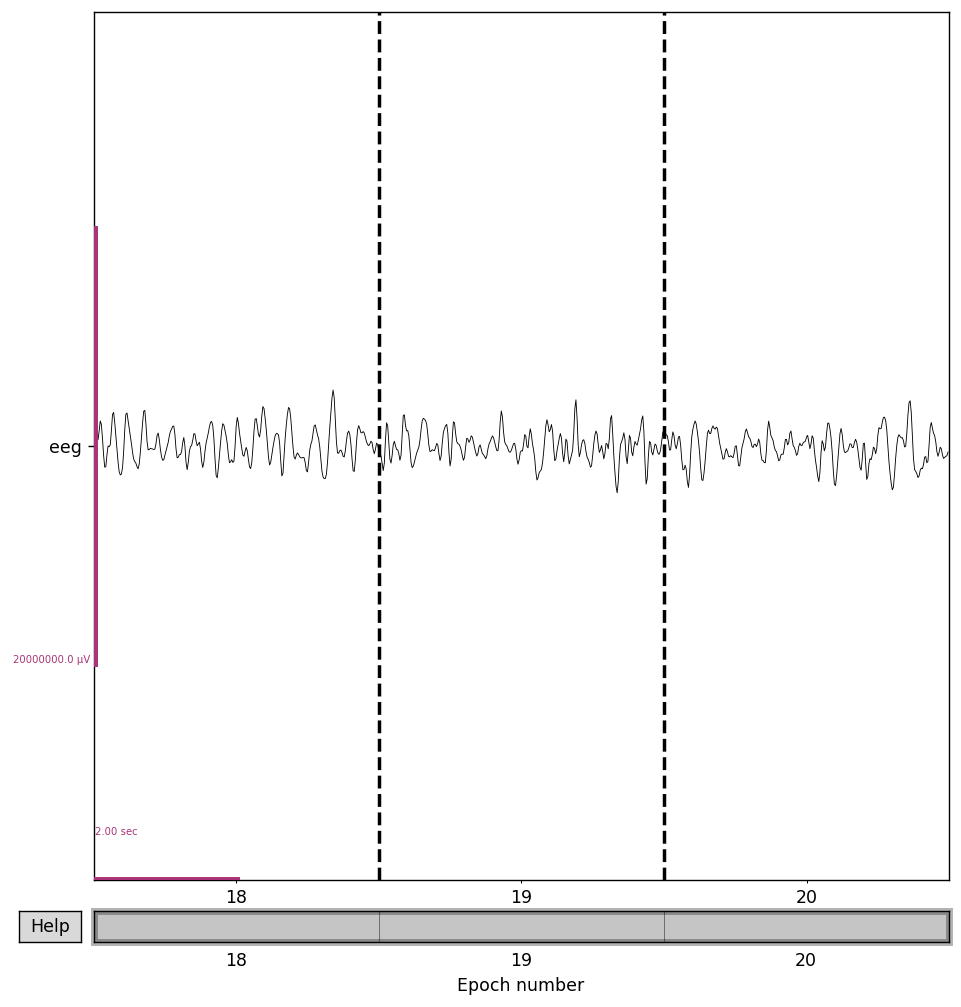

Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none
Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none
Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none


In [5]:
l_h = random.randint(0, len(epochs['HH'])-4)
l_m = random.randint(0, len(epochs['HL'])-4)
l_l = random.randint(0, len(epochs['LL'])-4)

epochs['HH'][l_h:l_h+3].plot(butterfly=True, scalings=10, title="HH")
epochs['HL'][l_h:l_h+3].plot(butterfly=True, scalings=10, title="HL")
epochs['LL'][l_h:l_h+3].plot(butterfly=True, scalings=10, title="LL")


## Paint PSD

### psd by label

In [ ]:
psd_all(epochs)

In [ ]:
import matplotlib.pyplot as plt 

def psd_all(epochs, log=False, twolabels=True, ci=True):
  fig, ax = plt.subplots(figsize=(16, 9))
  
  def add_stg(cav, epochs,label):
    psd, freqs = epochs.compute_psd(fmin=1, fmax=14).get_data(
            return_freqs=True)  # , fmin=fmin, fmax=fmax, n_jobs=1)
    total_power = np.sum(psd, axis=-1, keepdims=True)
    # normalized_psd = (psd / total_power)  # 100*(psd1 / total_power)
    normalized_psd = 10 * np.log10 (psd / total_power)
    m1 = np.mean(normalized_psd, axis=0)[0]
    sd1 = np.std(normalized_psd, axis=0)[0]
    cav.plot(freqs, m1,label = label)  # , label="HTW: "+str(len(epochs['R'])))
    cav.fill_between(freqs, m1-sd1, m1+sd1, alpha=.2)
  if twolabels:
    add_stg(ax, epochs["HH"],"H>H" )
    add_stg(ax, epochs["HL"],"H>L" )
    add_stg(ax, epochs["LL"],"L>L" )
  else:
    add_stg(ax, epochs["H"],"H" )
    add_stg(ax, epochs["L"],"L" )

  # Add .. to the plot
  ax.legend()
  ax.set_xticks(np.arange(0, 20, 1))
  ax.set_xlabel('Frequency (Hz)')
  ax.set_ylabel('Power Spectral Density (dB)')
  ax.set_title('Power Spectral Density')

  # Show the plot
  plt.grid()
  plt.show()
